In [35]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Introducción a redes neuronales con Keras
Las redes neuronales constituyen uno de los modelos más interesantes y complejos dentro de Machine Learning, pueden ser utilizados en tareas tanto de clasificación, como de regresión, su unidad básica es la **neurona** o simplemente **unidad**, de la cual combinando muchas neuronas entre sí, se obtiene una red que es capaz de resolver problemas bastante complejos, es un modelo inspirado en como funcionan las neuronas bilógicas de nuestro cerebro, a continuación describiremos en que consiste una neurona, que es la unidad básica de cómputo dentro de una red neuronal.

## Modelo de una neurona


<center><img src="https://drive.google.com/uc?id=1GYRNoiQr9mYVohLqBJlkaJ0vvMAvxSbl" alt="Neurona" width="400"></center>

Una neurona consiste en una unidad computacional de $n$ variables de entrada y una salida $y$, además de tener $n$ entradas, también se le agrega una entrada adicional $b$ llamada **bias** el cual es una constante. La gracia de una neurona es que al igual que un modelo de **regresión lineal**, todas las entradas son sumadas de manera ponderada, lo que significa que a cada una de las variables se les multiplica por un parámetro $w$ llamado **peso**, el resultado de dicha suma ponderada la llamaremos $z_l$. De por momento no existe diferencia alguna entre una neurona y un modelo de regresión lineal ya que:
$$ z_l = \sum_{j=1}^{n}w_jx_j + b $$
Pero, la gran diferencia entre una red neuronal y un modelo de regresión lineal es que en vez de utilizar la salida de la suma ponderada, dicha suma es pasada por una **función de activación**, la cual la representaremos con la letra $\sigma$, por ende el modelo completo de una neurona queda determinado por las siguientes ecuaciones.

$$y = \sigma(z_l)$$
$$z_l = \sum_{j=1}^{n}w_jx_j + b $$

La función de activación puede tomar muchas formas, pero las más comunes son:

### Función Sigmoide
Es la misma función utilizada en regresión logística, se define como
$$\sigma(z_l) = \frac{1}{1+e^{-z_l}}$$



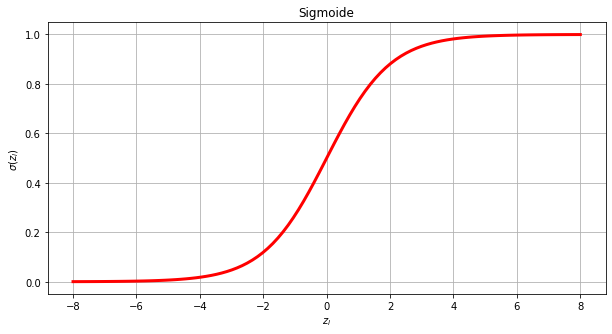

In [37]:
z_l = np.linspace(-8, 8, 100)
sigma_zl = 1 / (1 + np.exp(-z_l))

plt.figure(figsize=(10,5))
plt.plot(z_l, sigma_zl, linewidth=3, c="red")
plt.grid(True)
plt.title("Sigmoide")
plt.xlabel("$z_l$")
plt.ylabel("$\sigma(z_l)$")
plt.show()

### Tangente Hiperbólica
Es una función similar a la función sigmoide con la diferencia de que va dentro del rango de -1 a 1, en vez de ir de 0 a 1, se define como:
$$ tanh(z_l) = \frac{e^{z_l} - e^{-z_l}}{e^{z_l} + e^{-z_l}} $$

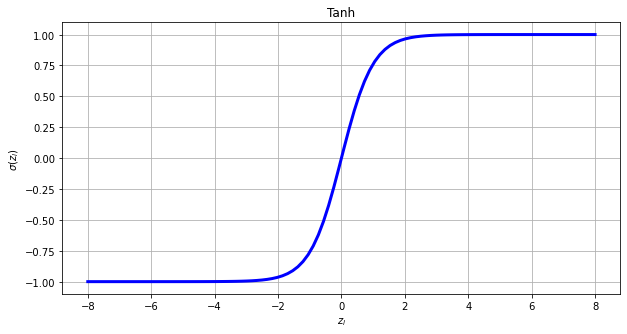

In [38]:
tanh_zl = np.tanh(z_l)

plt.figure(figsize=(10,5))
plt.plot(z_l, tanh_zl, linewidth=3, c="blue")
plt.grid(True)
plt.title("Tanh")
plt.xlabel("$z_l$")
plt.ylabel("$\sigma(z_l)$")
plt.show()

### ReLu
**ReLu** viene de **unidad lineal rectificada**,
es la función más utilizada para entrenar redes neuronales debido a su simplicidad y también debido a que empírica
 y teoricamente muestra mayores tasas de convergencia, en comparación a tanh y
 sigmoide, más adelante veremos el porqué. Dicha función se define como:
 $$ReLu(z_l) = max(0, z_l)$$

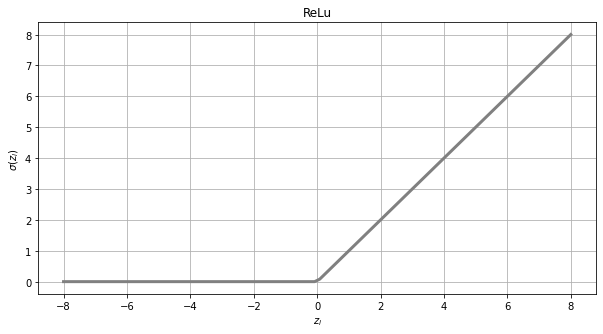

In [39]:
relu_zl = np.maximum(z_l, 0)

plt.figure(figsize=(10,5))
plt.plot(z_l, relu_zl, linewidth=3, c="grey")
plt.grid(True)
plt.title("ReLu")
plt.xlabel("$z_l$")
plt.ylabel("$\sigma(z_l)$")
plt.show()

### Escalón
Es la función de activación más antigua, utilizada en las primeras investigaciones sobre redes neuronales, hoy en día se utilizada solamente para fines pedagógicos debido a su simpleza de entendimiento. Se define como:
$$
\sigma(z_l)= \left\{ \begin{array}{lcc}
             0 &   si  & z_l < 0 \\
             1  &  si  & z_l \geq 0
             \end{array}
   \right.
$$

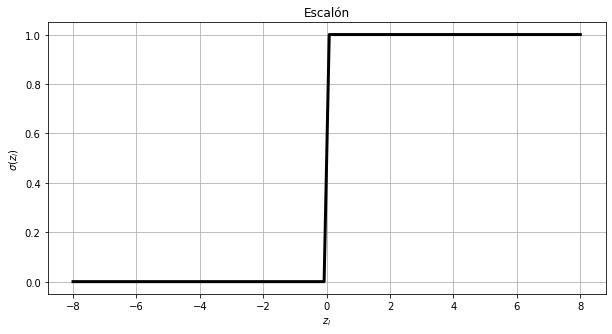

In [40]:
step_zl = np.heaviside(z_l, 0.5)

plt.figure(figsize=(10,5))
plt.plot(z_l, step_zl, linewidth=3, c="black")
plt.grid(True)
plt.title("Escalón")
plt.xlabel("$z_l$")
plt.ylabel("$\sigma(z_l)$")
plt.show()

En principio podría parecer un poco misterioso el porqué se le aplica una función de activación a una neurona, pero a medida que avanzemos, todo quedará mucho más claro.

## Red neuronal
En primera instancia podría parecer que una sola neurona por si solo no es de mucha utilidad, de hecho, si utilizamos la función sigmoide como activación, terminaría siendo un modelo de regresión logística practicamente. Para entender la función de las neuronas y de la función de activación, intentemos resolver el siguiente problema:

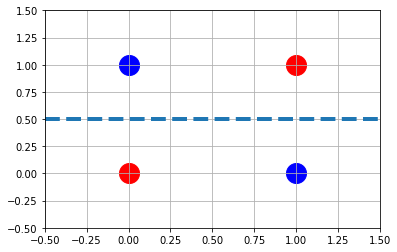

In [41]:
X1, y1 = ([0, 1], [0, 1])
X2, y2 = ([0, 1], [1, 0])
x = np.linspace(-0.5, 1.5, 100).reshape(-1, 1)
y = np.zeros((100, 1)) + 0.5
plt.scatter(X1, y1, s=400, c='red')
plt.scatter(X2, y2, s=400, c='blue')
plt.plot(x,y, '--', linewidth=4)
plt.grid(True)
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.show()

Si desearamos clasificar los puntos que se muestran en la figura anterior utilizando una neurona, podriamos utilizar el escalón como función de activación, entonces si la salida de la neurona es 1, significa que es de la categoría azul y si es 0, sería de la categoría roja, entonces simplemente habría que ajustar los parámetros de la neurona hasta generar una combinación que pueda categorizar correctamente los puntos de la figura, sencillo no? El único problema que surge con el razonamiento anterior, es que ajustar los parámetros de la neurona significa encontrar una recta que sea capaz de separar todos los puntos en dos categorías de manera correcta, pero si observamos la recta punteada de la figura anterior, pareciera de que no existe manera alguna de separar los puntos rojos de los puntos azules utilizando sólo una recta, entonces, que se puede hacer al respecto?

### Primera Arquitectura Neuronal
Para solucionar el problema, necesitaremos simplemente usar más neuronas! en la imagen a continuación se muestra una red neuronal compuesto por 3 neuronas, dos entradas y una salida.

<center><img src="https://drive.google.com/uc?id=1nl7loIVT78UvdBH1OO-UjxX93qXJLvlD" alt="Red Neuronal Simple" width="600"></center>

Uno se preguntará como esto nos puede ayudar y de que se diferencia del caso anterior? Pues, resulta que tenemos muchos más parámetros con qué trabajar! De hecho tenemos exactamente 9 parámetros que podemos controlar, 6 pesos y 3 bias. Teniendo ahora 3 neuronas, podemos enfocarnos en que las primeras dos se **especializen** en separar los puntos utilizando una línea recta cada una, mientras que la última neurona se puede enfocar en tomar la desición de la categoría a la cual el punto corresponde, la imagen a continuación muestra un escenario ideal, que muestra la separación que las primeras dos neuronas realizan.

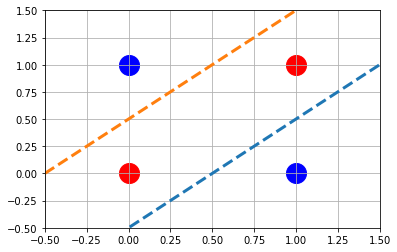

In [42]:
x_ = np.linspace(-0.5, 1.5, 100)
y_1_ = x - 0.5
y_2_ = x + 0.5
plt.scatter(X1, y1, s=400, c='red')
plt.scatter(X2, y2, s=400, c='blue')
plt.plot(x_,y_1_, '--', linewidth=3)
plt.plot(x_,y_2_, '--', linewidth=3)
plt.grid(True)
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.show()

Ahora simplemente la última neurona tiene que definir si el punto se encuentra entre las dos rectas, o se encuentra fuera de estas para realizar su desición de clasificación. Con este análisis podemos concluir dos puntos muy relevantes:

- La función de activación es escencial en el sentido de que permite **distorcionar** la salida de tal manera de que sea posible realizar tareas de clasificación, en otras palabras, **permite el aprendizaje** de la neurona.

- La **especialización** es la base que permite que redes neuronales complejas, puedan solucionar problemas complejos, en donde la primera capa de neuronas resuelven problemas bastante sencillos, mientras que las últimas capas realizan clasificaciones sofisticadas. A esto se le llama **deep learning**.


> El problema expuesto en esta sección se conoce como el problema **XOR** el cual fue uno de los primeros problemas investigados para determinar el potencial de las redes neuronales, sin la función de activación, la red no sería capaz de resolver dicho problema debido a un simple teorema que plantea que la composición de varias **transformaciones lineales** es simplemente una **transformación lineal**, por lo que se hace necesario agregar una deformación **no lineal**.

### Arquitectura general
A continuación formalizaremos lo que hemos discutido sobre redes neuronales, en la práctica existen diversas arquitecturas posibles, por lo que procederemos a mostrar el esquema general de una red introduciendo conceptos importantes, en la figura a continuación se puede apreciar dicha arquitectura.

<center><img src="https://drive.google.com/uc?id=1ukQgTHGlydVberc7nRJAPSCWgoRvsEdO" alt="Red Neuronal General" width="800"></center>

- La **capa de entrada** consiste en las variables o características que serán alimentadas a la red neuronal, por ejemplo si queremos clasificar el precio de una casa como "*costoso*" o "*barato*", las características de entrada podrían ser el *precio*, *numero de habitaciones*, *metros cuadrados*, etc.
- Las **capas ocultas** son todas aquellas que no están a la "*vista*", es decir, no generan un resultado final, pero sus cómputos si afectan a las variables de salida y son estimuladas por la capa de entrada o capas ocultas anteriores.
- La **capa de salida** es la última capa de una red neuronal y es la capa que expone el resultado final de la red, una vez realizado todos los cálculos.

### Notación y ecuaciones generales
Antes de continuar, es importante hacer hincapié en la notación utilizada a lo largo de este artículo, ya que con tantas neuronas y tantas conexiones, se puede volver confuso, pero con el tiempo la notación se irá volviendo mucho más familiar.

- $L$: Corresponde a la última capa de la red neuronal.
- $l$: Hace referencia a alguna capa de la red.
- $a_{i}^{l}$: Corresponde a la activación de la neurona $i$, en la capa $l$.
- $w_{jk}^{l}$: Corresponde al **peso** de la conexión entre la neurona $k$ de la capa $l-1$, a la neurona $j$ de la capa $l$.
- $b_{j}^{l}$: Corresponde al **bias** de la neurona $j$ en la capa $l$.
- $\sigma$: Corresponde a la función de activación.
- $z_{j}^{l}$: Suma ponderada neurona $j$, capa $l$.

Con la notación expuesta, tendriamos que la activación de cada neurona viene dado por la siguiente ecuación:

$$a_{i}^{l} = \sigma(z_{j}^{l})$$
$$z_j^l = \sum_{k}w_{jk}^{l}a_k^{l-1} + b_j^l$$

Podemos ver que son muchos índices revueltos por todas partes, podemos facilitar bastante la notación si es que definimos los siguientes vectores y matrices:

- $\boldsymbol{a^l} = [a_1^l, a_2^l, \dots,a_j^l]^T$: Corresponde a un vector que contiene la activación de todas las neuronas de la capa $l$.
- $\boldsymbol{b^l} = [b_1^l, b_2^l, \dots,b_j^l]^T$: Corresponde a un vector que contiene todos los **bias** de cada neurona de la capa $l$.
- $\boldsymbol{z^l} = [z_1^l, z_2^l, \dots,z_j^l]^T$: Corresponde a un vector que contiene todas las sumas ponderadas de cada neurona de la capa $l$.

Para condensar todos los pesos de una capa, podemos definir la siguiente **matriz de pesos**, donde cada fila representa las conexiones de las neuronas de la capa anterior, hacia una neurona de la capa *l*.

$$ \boldsymbol{W^l} = \begin{bmatrix}
w_{11}^l & w_{12}^l & \dots & w_{1k}^l\\
w_{21}^l & w_{22}^l & \dots & w_{2k}^l\\
\vdots & \vdots & \ddots & \vdots \\
w_{j1}^l & w_{j2}^l & \dots & w_{jk}^l
\end{bmatrix}$$

Definido esto, podemos representar las ecuaciones anteriores de la siguiente forma, el cual corresponde al cálculo de la activación de la capa $l$, en función de la capa anterior:

$$\boldsymbol{a^l} = \sigma(\boldsymbol{z^l})$$
$$\boldsymbol{z^l} = \boldsymbol{W^l}\boldsymbol{a^{l-1}} + \boldsymbol{b^l}$$

A la ecuación anterior, se le llama **Ecuación de Feedforward**.

## Entrenando una red neuronal
Ya tenemos a disposición un modelo completo de una red neuronal, más en específico se le llama **red neuronal secuencial totalmente conectado**, el problema es que para que nos sea de utilidad, tenemos que poder ajustar los parámetros del modelo de alguna forma, y para eso necesitamos de una función de coste el cual nos permitirá medir el rendimiento del modelo y un algortimo que permita corregir dichos parámetros en base al error. Supondremos que se tiene un **dataset** con $n$ etiquetas que serán utilizadas para calcular el error, cada etiqueta es un vector del mismo tamaño que la capa de salida de la red.

### Error cuadrático medio
Si queremos utilizar nuestra red para predecir valores en un rango continuo, el error cuadrático medio es la métrica por excelencia para dichos problemas, para nuestra red neuronal, se define de la siguiente manera, escrito en notación normal y matricial:
$$ MSE(\boldsymbol{a^L}) = \frac{1}{2n}\sum_i \sum_j \left(a_j^L - a_j^{(i)}\right)^2 $$

$$ MSE(\boldsymbol{a^L}) = \frac{1}{2n}\sum_i \left(\boldsymbol{a^L} - \boldsymbol{a^{(i)}}\right)^2 $$

$a_j^{(i)}$ hace referencia a la categoría $j$ de la instancia $i$ del **dataset**. Nótese que el error es función únicamente de la activación de la capa de salida.


### Entropía cruzada y softmax
Al momento de clasificar, generalmente utilizaremos la entropía cruzada como **función de coste** debido a que toma en cuenta la cercanía entre una predicción y la categoría correcta, mientra más alejado se esté de la categoría correcta, mayor serpa el valor de la entropía cruzada, se define de la siguiente manera:

$$ CE = -\sum_i \sum_j a_j^{(i)}log(a_j^L)$$
$$ CE = -\sum_i \boldsymbol{a}^{(i)T} log(\boldsymbol{a^L})$$

Es importante mencionar que para utilizar la entropía cruzada, se utiliza la función **softmax** como función de activación de la última capa. **Softmax** se caracteriza por ser una función el cual **comprime** los valores de entrada a un rango entre $[0, 1]$, con la importante característica de que la suma de los valores de salida es **siempre 1**, por lo tanto las salidas se pueden interpretar como probabilidades de pertenencia a dicha clase. La función **softmax** se define de la siguiente manera:
$$a_j^L = \frac{e^{z_j^L}}{\sum_k e^{z_k^L}}$$

<center><img src="https://drive.google.com/uc?id=1r2Qj8BzTIg0heMIO7DGsSGMzbAM8GOvL" alt="Red Neuronal General" width="500"></center>

### Backpropagation

Tenemos ya nuestro modelo y nuestra función de coste para medir el rendimiento de la red, pero como lo entrenamos? Podriamos manualmente manipular los parámetros hasta que el error llegue a un valor deseado, pero con eso no llegariamos a ninguna parte y tardariamos una eternidad, podriamos utilizar la misma estrategia con la cual entrenabamos nuestros modelos de regresión lineal y regresión logística, utilizando el **descenso del gradiente**, tendriamos que simplemente para cada iteración, calcular el error, luego el gradiente del error y actualizar los parámetros, pero hay un único problema. ¿Cómo calculamos el gradiente del error de la red? Si bien depende de la capa de salida, está depende de la capa anterior, que a su vez depende de la capa anterior y así sucesivamente. Si tenemos por ejemplo una red neuronal de 4 entradas, 4 capas ocultas con 4 neuronas cada capa y 4 neuronas de salida, tendriamos un total de $5 \times (4\times 4 + 4) = 100$ parámetros del cual el error depende! Definitivamente no es un problema sencillo, es por esto que en 1986 Rumelhart, Hinton y Williams introdujeron formalmente a través de un famoso paper el algoritmo de **backpropagation**.

Para entender la idea detrás de **backpropagation** hay que definir una variable fundamental, que además de ser utilizada para el algoritmo, nos da una intuición de como se comporta la red a lo largo del tiempo, a continuación procedemos a definir lo que se conoce como el **error de una neurona**:
$$ \delta_j^l = \frac{\partial a_j^l}{\partial z_j^l}$$

En otras palabras, el error de la neurona $j$ de la capa $l$, viene dado por la derivada parcial de la activación de dicha neurona con respecto a su suma ponderada. Es interesante observar que si el error de una neurona es grande, al modificar una de sus entradas, será más propenso a modificar de gran manera el error de la red. El objetivo del algoritmo es utilizar el error de cada neurona para calcular de manera sencilla el gradiente de la red y lo hace siguiendo los pasos descritos a continuación:

1. **Feedforward**: Alimenta a la red una o muchas instancias del **dataset** y calcula la salida para cada instancia utilizando la **ecuación de feedforward**.
2. **Cálculo del error**: Calcula el error de cada neurona de la última capa de la red.
3. **Backpropagation**: A partir del error de cada neurona de la última capa, calcula el error de la capa anterior, luego de la capa anterior a esa y así sucesivamente, hasta llegar a la primera capa de la red, he ahí el nombre del algoritmo.
4. **Calculo del gradiente**: Teniendo el error de todas neuronas, calcula el gradiente de la función de coste.

5. **Actualización de parámetros**: Teniendo el gradiente de la función de coste, actualiza los parámetros del modelo realizando una iteración del descenso del gradiente.
6. **Repetición**: Repite los pasos anteriores hasta converger a un valor determinado.


De los pasos descritos, surguen tres interrogantes, ¿Cómo se calcula el error de la última capa?, ¿Cómo se propaga hacia atras el error? y, ¿Cómo se calcula el gradiente utilizando los errores? Todas estas preguntas se responden gracias a las **ecuaciones de backpropagation**, pero antes de mostrarlas, definiremos un par de notaciones relevantes.

 > **Backpropagation** es un algoritmo computacionalmente costoso, pero es posible de realizar con el hardware existente, cosa que no era posible antes de la invención de este algoritmo, el cual luego de su salida, potenció enormemente el desarrollo en el área de deep learning.

Definiremos el vector $\boldsymbol{\delta^l}= [\delta_1^l, \delta_2^l, \dots, \delta_j^l]^T$ como el vector de **errores** de la capa $l$, $\nabla_{a^L}C = [\frac{\partial C}{\partial a_1^L}, \frac{\partial C}{\partial a_2^L}, \dots, \frac{\partial C}{\partial a_j^L}]^T$ corresponde al gradiente de la función de coste con respecto a la activación de la última capa y además definiremos el operador $\odot$, como el producto elemento a elemento entre dos vectores, es decir, si tenemos dos vectores $\boldsymbol{a}$ y $\boldsymbol{b}$, entonces la multiplicación punto a punto se define como:
$$ \boldsymbol{a}\odot \boldsymbol{b} = \begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_j
\end{bmatrix} \odot \begin{bmatrix}
b_1 \\ b_2 \\ \vdots \\ b_j
\end{bmatrix} = \begin{bmatrix}
a_1b_1 \\ a_2b_2 \\ \vdots \\ a_jb_j
\end{bmatrix} $$

Ya teniendo estas definiciones disponibles, tenemos finalmente que las **ecuaciones de backpropagation** son las siguientes:

$$ \boldsymbol{\delta^L} = \nabla_{a^L} C \odot \dot{\sigma}(\boldsymbol{z^L}) $$
$$ \boldsymbol{\delta^l} = \left[ \left(\boldsymbol{W^{l+1}}\right)^T \boldsymbol{\delta^{l+1}} \right] \odot \dot{\sigma}(\boldsymbol{z^l}) $$
$$ \frac{\partial C}{\partial b_j^l} = \delta_j^l $$
$$ \frac{\partial C}{\partial w_{jk}^l} = \delta_j^l a_k^{l-1} $$



Antes de finalizar nuestra discusión sobre backpropagation, es importante concluir los siguientes puntos:

- Teniendo el error de cada neurona, el calculo del gradiente es inmediato, ya que se compone de valores calculados previamente.

- El error de cada neurona **depende directamente** de la derivada de la función de activación.

### Velocidad de aprendizaje
Nótese como al final de la sección anterior mencionamos que el error de cada neurona es **directamente proporcional** a la derivada de la función de activación, esto implica que el gradiente de la función de coste con respecto a los parámetros también lo será, aquello tiene implicaciones importantes al momento de escoger la función de activación, para ilustrarlo mostraremos a continuación la gráfica de la derivada de las funciones de activación más utilizadas:

In [43]:
from scipy.misc import derivative

def sigmoid(x):
  return 1 / (1 + np.exp(-x))
def relu(x):
  return np.maximum(0, x)
def step(x):
  return np.heaviside(x, 0.5)

def plot_function_and_derivative(
    ax, function, x, func_name, xlabel, ylabel, title):
  ax.plot(x,function(x), c='blue', label=func_name, linewidth=3)
  ax.plot(x,derivative(function,x), c='red', label='Derivada', linewidth=3)
  ax.set_title(title, fontsize=20)
  ax.set_xlabel("x", fontsize=20)
  ax.set_ylabel(ylabel, fontsize=20)
  ax.legend()
  ax.grid(True)



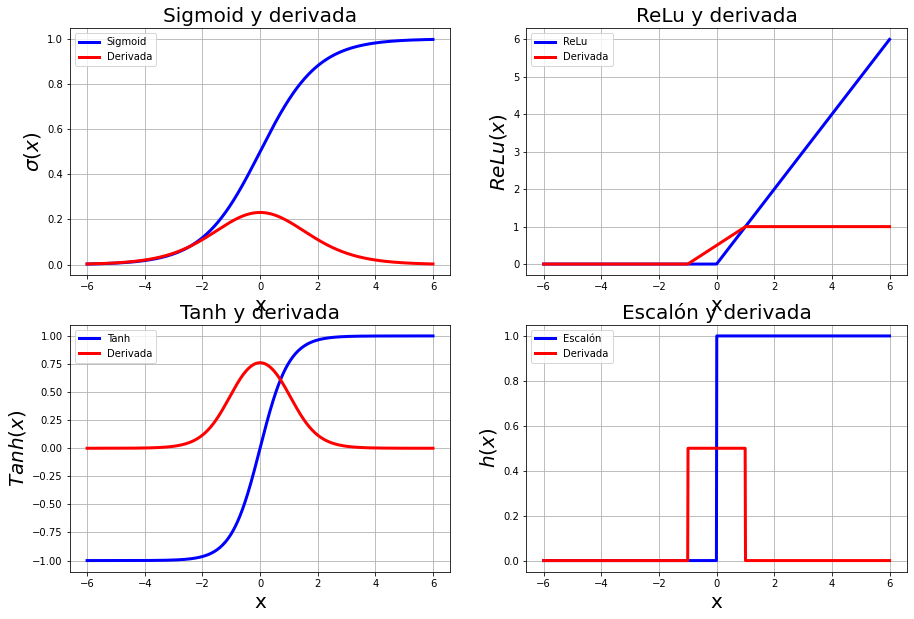

In [44]:
x = np.linspace(-6, 6, 1000)

fig, ax = plt.subplots(2, 2, figsize=(15,10))
plot_function_and_derivative(
    ax[0,0], sigmoid, x, "Sigmoid", "x", "$\sigma(x)$", "Sigmoid y derivada")
plot_function_and_derivative(
    ax[0,1], relu, x, "ReLu", "x", "$ReLu(x)$", "ReLu y derivada")
plot_function_and_derivative(
    ax[1,0], np.tanh, x, "Tanh", "x", "$Tanh(x)$", "Tanh y derivada")
plot_function_and_derivative(
    ax[1,1], step, x, "Escalón", "x", "$h(x)$", "Escalón y derivada")

Nótese que tanto la función **escalón**, como **ReLu** no son diferenciables en 0, por ende los valores observados alrededor de 0 es como **scipy** maneja dicha indefinición. Lo importante a destacar es lo que sucede cuando la función se acerca a 1, en el caso de la función **sigmoide** y **tanh** la derivada tiende a 0, esto conlleva a la siguiente aseveración:

- Utilizando la función **sigmoide** o **tanh**, mientras más saturado se encuentre una neurona, menor será su velocidad de aprendizaje, debido a que la neurona será incapaz de cambiar significativamente el error de la red.

Por otra si observamos la función **ReLu**, podemos concluir lo siguiente:

- La velocidad de aprendizaje de una red neuronal utilizando **ReLu** como función de activación, es independiente del nivel de saturación de la neurona, esto se debe a que la derivada de dicha función es constante en todo el rango positivo de la neurona.

Por último, tenemos que:

- La función **escalón** **no sirve** para el aprendizaje, esto se debe a que su derivada es 0 en todo el rango de la función (exceptuando el 0).

## Introducción a Keras
A sido un largo camino y con ello hemos visto bastante teoría, pero ya es momento de poner todo en práctica y lo haremos intentando solucionar el siguiente problema:

<p align="center"><em>Se requiere construir un modelo capaz de clasificar prendas de vestir, utilizando imágenes<br> de vestimenta extraidas de una base de datos llamada <strong>Fashion MNIST</strong>, se espera obtener<br>una presición mayor al 90% utilizando una red neuronal secuencial.</em></p>

Para atacar el problema utilizaremos **Keras** el cual es un **API** de alto nivel creado por *François Chollet* y mantenido por *Google*, permite diseñar, implementar y entrenar modelos de redes neuronales de manera sencilla e intuitiva y utiliza como motor computacional **Tensorflow 2**, es una **API** inspirada en la famosa libreria **Scikit Learn**, para utilizarla simplemente importamos la librería como se muestra a continuación.

In [45]:
import tensorflow as tf
import random
from tensorflow import keras

### Exploración de datos
Como utilizaremos la base de datos **Fashion MNIST**, lo primero que haremos es cargarla, esto es posible realizarlo mediante Keras.

In [46]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [47]:
print(X_train_full.shape)
print(X_train_full.dtype)
print(y_train_full.shape)
print(y_train_full.dtype)

(60000, 28, 28)
uint8
(60000,)
uint8


> Se llama **Fashion MNIST** debido a que es una adaptación de la base de datos **MNIST**, tiene exactamente la misma estructura en el sentido de que son imágenes de 28x28 pixeles en escala de grises, cada pixel teniendo un rango de 0 a 255. Podemos ver que la base de datos ya viene separada en un conjunto de entrenamiento y un conjunto de prueba, si queremos visualizar una instancia de nuestro dataset, podemos ejecutar el siguiente código:


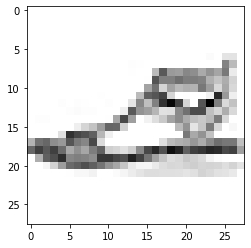

In [48]:
idx = random.randint(0, 59999)
instance = X_train_full[idx, :, :]
plt.imshow(instance, cmap='gray_r')

Si observamos la estructura de las etiquetas, podemos observar que corresponden a valores numéricos sin signo, donde cada valor corresponde a un tipo de prenda, por lo que si queremos tener una representación legible, deberemos generar una lista con los nombres de cada categoría.

In [49]:
class_names = ["Polera", "Pantalón", "Polerón", 
               "Vestido", "Abrigo", "Sandalia", 
               "Camisa", "Zapatillas", "Mochila/Cartera", "Taco"]
class_names[y_train_full[idx]]

'Sandalia'

Para poder crear y entrenar nuestra red neuronal, necesitamos adecuar nuestro dataset para que el entrenamiento sea óptimo, por lo que procederemos a normalizar los valores de cada imagen a un rango entre 0 y 1, además, crearemos un grupo de validación, que utilizaremos durante el proceso de entrenamiento.

In [50]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] / 255.0, y_train_full[5000:] / 255.0

### Creación de red neuronal
Teniendo ya nuestros datos listos para el entrenamiento, utilizaremos Keras para construir nuestro modelo de red neuronal, la API es intuitiva de utilizar y nos permite tener mucha flexibilidad al momento de crear nuestros modelos.

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Lo primero que hacemos es crear un modelo secuencial, lo cual nos permite ir agregando capas una tras otra, en donde la salida de una capa se alimenta a la entrada de la capa siguiente. La primera capa corresponde a una capa de preprocesamiento, en donde ajusta nuestro arreglo de 28x28 pixeles a un arreglo plano de 1x784, el cual será alimentado a la siguiente capa. Las capas posteriores corresponden a **capas densas**, la cual ya exploramos en las secciones anteriores, por lo que nuestra red neuronal corresponde a una **red secuencial totalmente conectada** (o red MLP). Cabe destacar que se utiliza la función de activación ReLu en todas las capas, exceptuando la última en donde se utiliza la función softmax, cosa de interpretar la salida de la red como la probabilidad de que la entrada corresponda a una categoría en particular, también hay que destacar que la última capa contiene sólamente 10 neuronas, ya que queremos clasificar 10 posibles tipos de prendas.

Utilizando el método `summary`, podemos ver un resumen de nuestra red neuronal, donde se muestran la capaz creadas, el nombre de cada capa, la forma que tiene cada capa y la cantidad de parámetros entrenables y no entrenables. Cabe notar que el modelo tiene muchos parámetros (266.610 parámetros!) lo cual le da al modelo mucha flexibilidad de entrenamiento, pero al mismo tiempo corre el riesgo de hacer overfitting (junto a otros problemas que se verán más adelante).

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


También podemos acceder a todas las capas y a todos los parámetros utilizando nuestro modelo:

In [53]:
print(model.layers)

[<keras.layers.core.flatten.Flatten object at 0x7f44bd746450>, <keras.layers.core.dense.Dense object at 0x7f44bd746f90>, <keras.layers.core.dense.Dense object at 0x7f44b254e0d0>, <keras.layers.core.dense.Dense object at 0x7f44bd4c9190>]


In [54]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(weights)
print(biases)

(784, 300)
[[-3.6438253e-02  4.9555875e-02  6.1383143e-02 ... -6.0707431e-02
   4.2405926e-02 -3.2193959e-05]
 [ 1.7555967e-02  9.4652921e-03  2.4680980e-02 ...  7.3595569e-03
   7.1548536e-02  3.7059963e-02]
 [-3.7807863e-02 -1.8820234e-02 -1.3896190e-02 ...  9.0565607e-03
   4.6632037e-02  5.0151654e-02]
 ...
 [ 4.1010134e-02 -4.9826108e-02 -4.2498052e-02 ...  2.2034653e-02
   4.9556337e-02  4.5869827e-02]
 [ 4.0222093e-02 -3.8377851e-02  7.8043193e-03 ...  4.0970743e-03
   4.6357721e-02  2.9997371e-02]
 [-5.1667728e-02 -4.5209479e-02 -5.0317287e-02 ... -1.6803406e-02
   7.0411950e-02  4.7724828e-02]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.

### Entrenamiento de red neuronal

Una vez creado nuestro modelo, antes de realizar el entrenamiento, debemos primero compilarlo, en este proceso es donde especificamos la función de costo, el optimizador a utilizar y podemos además especificar una lista de métricas a calcular durante el entrenamiento, nótese que dichas métricas son diferentes a la función de costo, el cual este último tiene la función de optimizar los parámetros de la red, mientras que las métricas nos dan indicios sobre el desempeño en general de la red.

In [59]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.5),
              metrics=["accuracy"])

Ahora estamos listos para entrenar el modelo, para esto, al igual que como se entrena un modelo en la libreria de **scikit-learn**, utilizamos el método `fit` de nuestro modelo. El método tiene como parámetros el dataset de entrenamiento, seguido de las etiquetas, además, podemos especificar el número de **epochs** que corresponde a la cantidad de veces el cual la red neuronal pasa por el dataset completo, finalmente, pasamos el dataset de validación que creamos anteriormente.

In [60]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.1298e-05 - accuracy: 0.1008 - val_loss: 7.9204e-06 - val_accuracy: 0.0914
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 6.1821e-06 - accuracy: 0.1008 - val_loss: 5.0425e-06 - val_accuracy: 0.0914
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 4.2365e-06 - accuracy: 0.1008 - val_loss: 3.6619e-06 - val_accuracy: 0.0914
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 3.2112e-06 - accuracy: 0.1008 - val_loss: 2.8616e-06 - val_accuracy: 0.0914
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 2.5785e-06 - accuracy: 0.1008 - val_loss: 2.3379e-06 - val_accuracy: 0.0914
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 2.1481e-06 - accuracy: 0.1008 - val_loss: 1.9693e-06 - val_accuracy: 0.0914
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.8382e-06 -